In [2]:
!git clone https://github.com/sanchit2843/image_classification

fatal: destination path 'image_classification' already exists and is not an empty directory.


In [0]:
os.chdir('/content')
!rm -r /content/image_classification

In [2]:
!pip install -i https://test.pypi.org/simple/ supportlib
import supportlib.gettingdata as getdata
getdata.kaggle()

Looking in indexes: https://test.pypi.org/simple/


Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

 93% 321M/344M [00:03<00:00, 71.0MB/s]
100% 344M/344M [00:04<00:00, 89.4MB/s]


In [0]:
getdata.zipextract('/content/intel-image-classification.zip')

In [0]:
getdata.zipextract('/content/seg_pred.zip')
getdata.zipextract('/content/seg_test.zip')
getdata.zipextract('/content/seg_train.zip')

In [3]:
import os
os.chdir('/content/image_classification')
import dataloader,model,training
from predict import predict
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import torchvision
import numpy as np

/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [0]:
im_size = 150
batch_size = 16
train_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor()])
train_data = torchvision.datasets.ImageFolder(root = '/content/seg_train', transform = train_transforms)
train_loader =  DataLoader(train_data, batch_size = batch_size , shuffle = True)

In [5]:
mean,std = dataloader.normalization_parameter(train_loader)

In [0]:
#image transformations for train and test data
train_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.RandomResizedCrop(size=315, scale=(0.95, 1.0)),
                                        transforms.RandomRotation(degrees=10),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.CenterCrop(size=299),  # Image net standards
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
test_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

#inverse normalization for image plot

inv_normalize =  transforms.Normalize(
    mean=-1*np.divide(mean,std),
    std=1/std
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

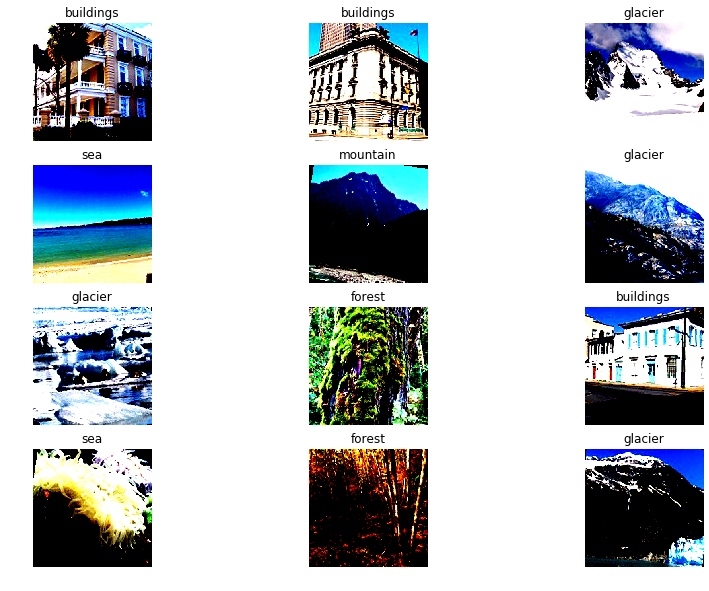

In [7]:
train_data = torchvision.datasets.ImageFolder(root = '/content/seg_train', transform = train_transforms)
test_data = torchvision.datasets.ImageFolder(root = '/content/seg_test', transform = test_transforms)
#label of classes
classes = train_data.classes
#encoder and decoder to convert classes into integer
decoder = {}
for i in range(len(classes)):
    decoder[classes[i]] = i
encoder = {}
for i in range(len(classes)):
    encoder[i] = classes[i]

dataloaders = dataloader.data_loader(train_data,encoder,test_data, valid_size = 0.2 , batch_size = batch_size)

In [8]:
classifier = model.classifier('efficientnet-b0',n_classes = 6,device = 'cuda')

Loaded pretrained weights for efficientnet-b0


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


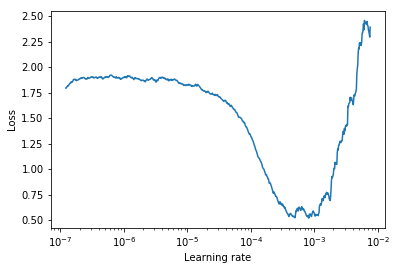

In [11]:
model.lr_finder(classifier,train_loader,'cuda')

In [0]:
# change learning rate value according to lr finder
lr = 0.0001

Epoch: 0
train Epoch: 0  [0/14034 (0%)]	Loss: 1.793586 	Acc: 0.250000
train Epoch: 0  [1600/14034 (11%)]	Loss: 0.485562 	Acc: 0.832921
train Epoch: 0  [3200/14034 (23%)]	Loss: 0.378341 	Acc: 0.867226
train Epoch: 0  [4800/14034 (34%)]	Loss: 0.330641 	Acc: 0.884344
train Epoch: 0  [6400/14034 (46%)]	Loss: 0.304305 	Acc: 0.895418
train Epoch: 0  [8000/14034 (57%)]	Loss: 0.284991 	Acc: 0.900574
train Epoch: 0  [9600/14034 (68%)]	Loss: 0.278560 	Acc: 0.902766
train Epoch: 0  [11200/14034 (80%)]	Loss: 0.268821 	Acc: 0.906116
train Epoch: 0  [12800/14034 (91%)]	Loss: 0.261915 	Acc: 0.907850
val Epoch: 0  [0/3000 (0%)]	Loss: 0.383502 	Acc: 0.875000
Validation loss decreased (inf --> 0.220967).  Saving model ...
val Accuracy: 0.90625
Epoch: 1
train Epoch: 1  [0/14034 (0%)]	Loss: 0.031957 	Acc: 1.000000
train Epoch: 1  [1600/14034 (11%)]	Loss: 0.185012 	Acc: 0.943688
train Epoch: 1  [3200/14034 (23%)]	Loss: 0.176309 	Acc: 0.942786
train Epoch: 1  [4800/14034 (34%)]	Loss: 0.172060 	Acc: 0.942899

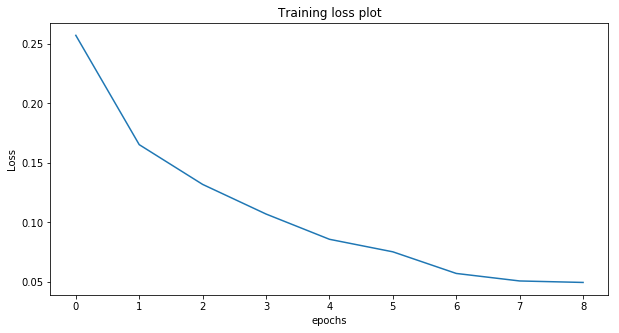

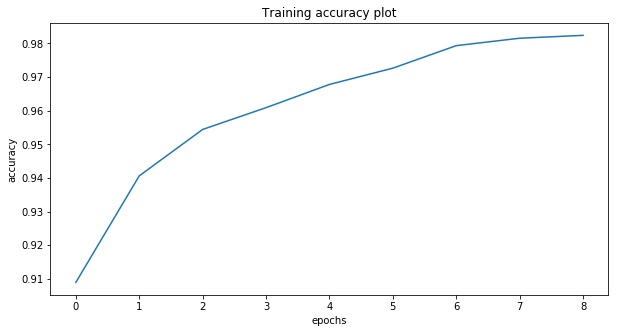

tensor(0.9200, device='cuda:0', dtype=torch.float64) 0.23692354505260785
Classes in order Actual and Predicted


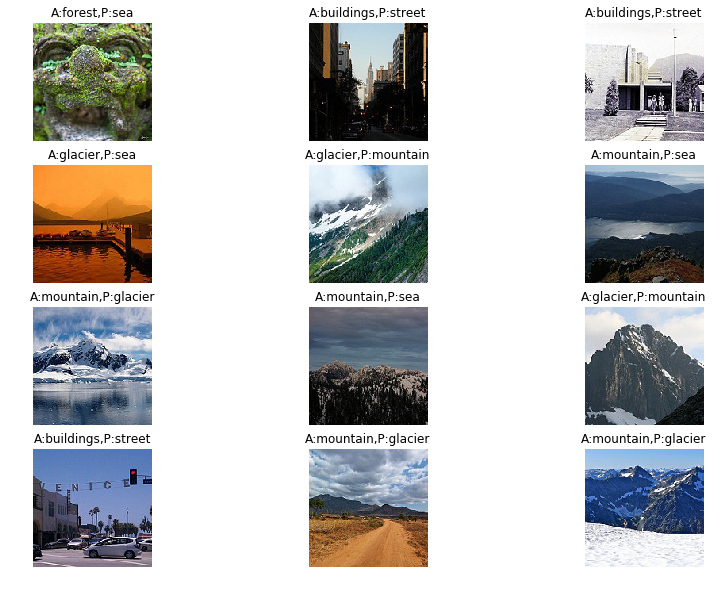

Precision: 92.06533756161114 Recall: 92.28080703104928, Accuracy: 92.0: ,f1_score: 92.12801949214649
Confusion matrix, without normalization
[[331   0   0   0   1  22]
 [  0 380   0   0   2   1]
 [  2   4 378  52  12   2]
 [  6   3  30 375  12   0]
 [  3   1   5   2 392   0]
 [ 28   0   0   1   3 352]]


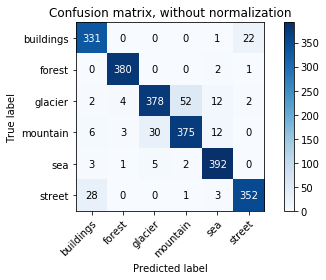

In [13]:
training.train_model(classifier,dataloaders,encoder,inv_normalize,10,lr,batch_size = batch_size,patience = 5,classes = classes,device = 'cuda')

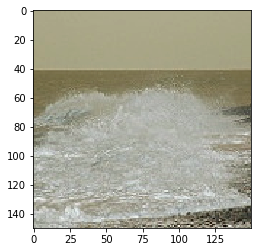

Class: sea , confidence: 99.93892669677734
Class: glacier , confidence: 0.051543738692998886
Class: mountain , confidence: 0.006666102912276983
Class: buildings , confidence: 0.001911995466798544
Class: street , confidence: 0.0005276749725453556


tensor([4], device='cuda:0')

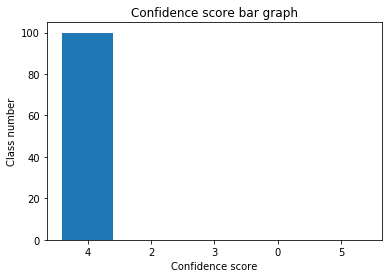

In [14]:
import cv2
image = cv2.imread('/content/seg_pred/11682.jpg')
predict(classifier,image,'cuda',encoder,test_transforms,inv_normalize)